In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools

from chessgame import ChessGame

In [23]:
games = pd.read_csv("data/games_chesstempo.csv")
games = games[np.logical_and(games["white_elo"] > 2500, games["black_elo"] > 2500)]
print(list(games.columns))

['id_game', 'moves', 'date', 'white_player', 'id_white_player', 'black_player', 'id_black_player', 'white_elo', 'black_elo', 'avg_elo', 'event', 'site', 'eco', 'opening', 'id_opening', 'round', 'result', 'n_moves', 'id_download']


In [36]:
game_string = games["moves"][0]
moves = game_string.split(" ")
print(game_string)
for i in range(0, len(moves), 2):
    moves[i] = moves[i][moves[i].index(".") + 1:]

print(moves)

1.e4 e5 2.Nf3 Nc6 3.Bc4 Bc5 4.c3 Nf6 5.d4 exd4 6.e5 d5 7.Bb5 Ne4 8.cxd4 Bb6 9.Nc3 O-O 10.Be3 Bf5 11.O-O Na5 12.Rc1 Bg6 13.Ne2 c6 14.Bd3 Qe7 15.a3 Rad8 16.Nf4 Bf5 17.Re1 Bg4 18.h3 Bxf3 19.gxf3 Ng5 20.Nh5 Nc4 21.Bb1 Nxe3 22.fxe3 f6 23.exf6 gxf6 24.Bf5 Kh8 25.Kf2 Rg8 26.Qd3 c5 27.dxc5 Bxc5 28.h4 d4 29.exd4 Qd6 30.Rxc5 Qh2+ 31.Ke3 Rde8+ 32.Be4 Nxf3 33.Qe2 Rxe4+ 34.Kxe4 Re8+ 35.Kxf3 Qh3+ 36.Ng3 
['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Bc5', 'c3', 'Nf6', 'd4', 'exd4', 'e5', 'd5', 'Bb5', 'Ne4', 'cxd4', 'Bb6', 'Nc3', 'O-O', 'Be3', 'Bf5', 'O-O', 'Na5', 'Rc1', 'Bg6', 'Ne2', 'c6', 'Bd3', 'Qe7', 'a3', 'Rad8', 'Nf4', 'Bf5', 'Re1', 'Bg4', 'h3', 'Bxf3', 'gxf3', 'Ng5', 'Nh5', 'Nc4', 'Bb1', 'Nxe3', 'fxe3', 'f6', 'exf6', 'gxf6', 'Bf5', 'Kh8', 'Kf2', 'Rg8', 'Qd3', 'c5', 'dxc5', 'Bxc5', 'h4', 'd4', 'exd4', 'Qd6', 'Rxc5', 'Qh2+', 'Ke3', 'Rde8+', 'Be4', 'Nxf3', 'Qe2', 'Rxe4+', 'Kxe4', 'Re8+', 'Kxf3', 'Qh3+', 'Ng3', '']


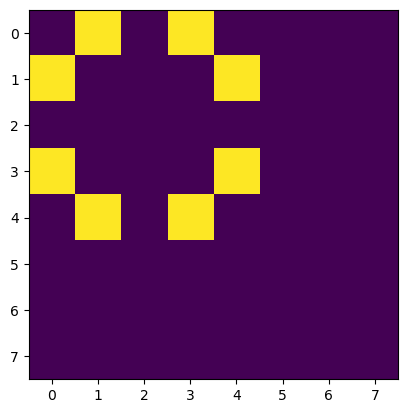

In [43]:
KNIGHT_DIFFS = np.array(
    [(rank_diff * rank_sign, file_diff * file_sign)
     for rank_diff, file_diff in [(1, 2), (2, 1)]
     for rank_sign in [-1, 1]
     for file_sign in [-1, 1]])

img = np.zeros((8, 8))

for rank, file in np.array([2, 2]) + KNIGHT_DIFFS:
    img[rank, file] = 1

plt.imshow(img)

In [48]:
DIAGONAL_DIRS = np.array(
    [(rank_diff, file_diff)
     for rank_diff in [-1, 1]
     for file_diff in [-1, 1]])

LATERAL_DIRS = np.array(
    [(rank_diff, file_diff) 
     for rank_diff, file_diff in zip([0, -1, 0, 1], [-1, 0, 1, 0])])

print(DIAGONAL_DIRS)

print(np.vstack((DIAGONAL_DIRS, LATERAL_DIRS)))

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]
 [ 0 -1]
 [-1  0]
 [ 0  1]
 [ 1  0]]


In [51]:
test = np.arange(9).reshape((3, 3))
print(test[[1, 2]])

[[3 4 5]
 [6 7 8]]
